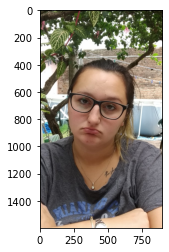

In [19]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace as df

img = cv2.imread('sad.jpeg')
plt.imshow(img) ##BGR

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))



In [20]:
predictions = df.analyze(img)

Action: race: 100%|██████████| 4/4 [00:33<00:00,  8.30s/it]


In [21]:
predictions

{'emotion': {'angry': 1.1830066330730915,
  'disgust': 0.04125139384996146,
  'fear': 14.54065591096878,
  'happy': 27.16444730758667,
  'sad': 10.03485694527626,
  'surprise': 0.6709076464176178,
  'neutral': 46.36486768722534},
 'dominant_emotion': 'neutral',
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 0.0907581233112512,
  'indian': 0.03313584997448027,
  'black': 0.0009388404787893698,
  'white': 93.16717900838601,
  'middle eastern': 3.233848525148454,
  'latino hispanic': 3.474141326444307},
 'dominant_race': 'white'}

In [25]:
#Trying to draw a rectangle across the face

In [22]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

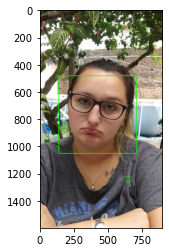

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

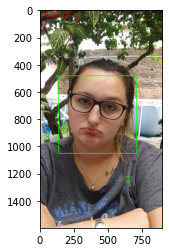

In [29]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
                predictions['dominant_emotion'],
                (50,50),
                font, 2,
                (0,0,255),
                2,
                cv2.LINE_4)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

#Real time video demo

In [1]:
import cv2
from deepface import DeepFace as df

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
#Check if webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while(True):

    ret, frame = cap.read()

    result = df.analyze(frame, actions=['emotion'])

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 2, 4)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y), (x+w, y+h), (0,255,0), 2)
    
    font= cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, result['dominant_emotion'], (50,50), font, 3, (0,0,255), 2, cv2.LINE_8)

    cv2.imshow('Original video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.